In [4]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)






#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


Question1


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_waveform(X: pd.DataFrame, y: pd.Series, num_rows: int = 3, num_cols: int = 2) -> None:
    """
    Plots the waveform for each activity class
    :param X: The input features extracted from MakeDataset.py
    :param y: The labels for the input features extracted from MakeDataset.py
    :param num_rows: Number of rows in the plot
    :param num_cols: Number of columns in the plot
    """
    columns = [f'axis_{axis}_{i}' for axis in ['x', 'y', 'z'] for i in range(500)]
    df = pd.DataFrame(X.reshape((X.shape[0], -1)), columns=columns)
    df['activity_class'] = y
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = np.ravel(axes)
    activity_classes = df['activity_class'].unique()
    activity_classes.sort()
    
    activity = {1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}
    
    for i, activity_class in enumerate(activity_classes):
        activity_df = df[df['activity_class'] == activity_class].drop('activity_class', axis=1)
        activity_mean = activity_df.mean()
        axes[i].plot(activity_mean)
        axes[i].set_xticks([])
        axes[i].set_title(f'{activity[activity_class]}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Acceleration')
    
    plt.tight_layout()
    plt.show()
   

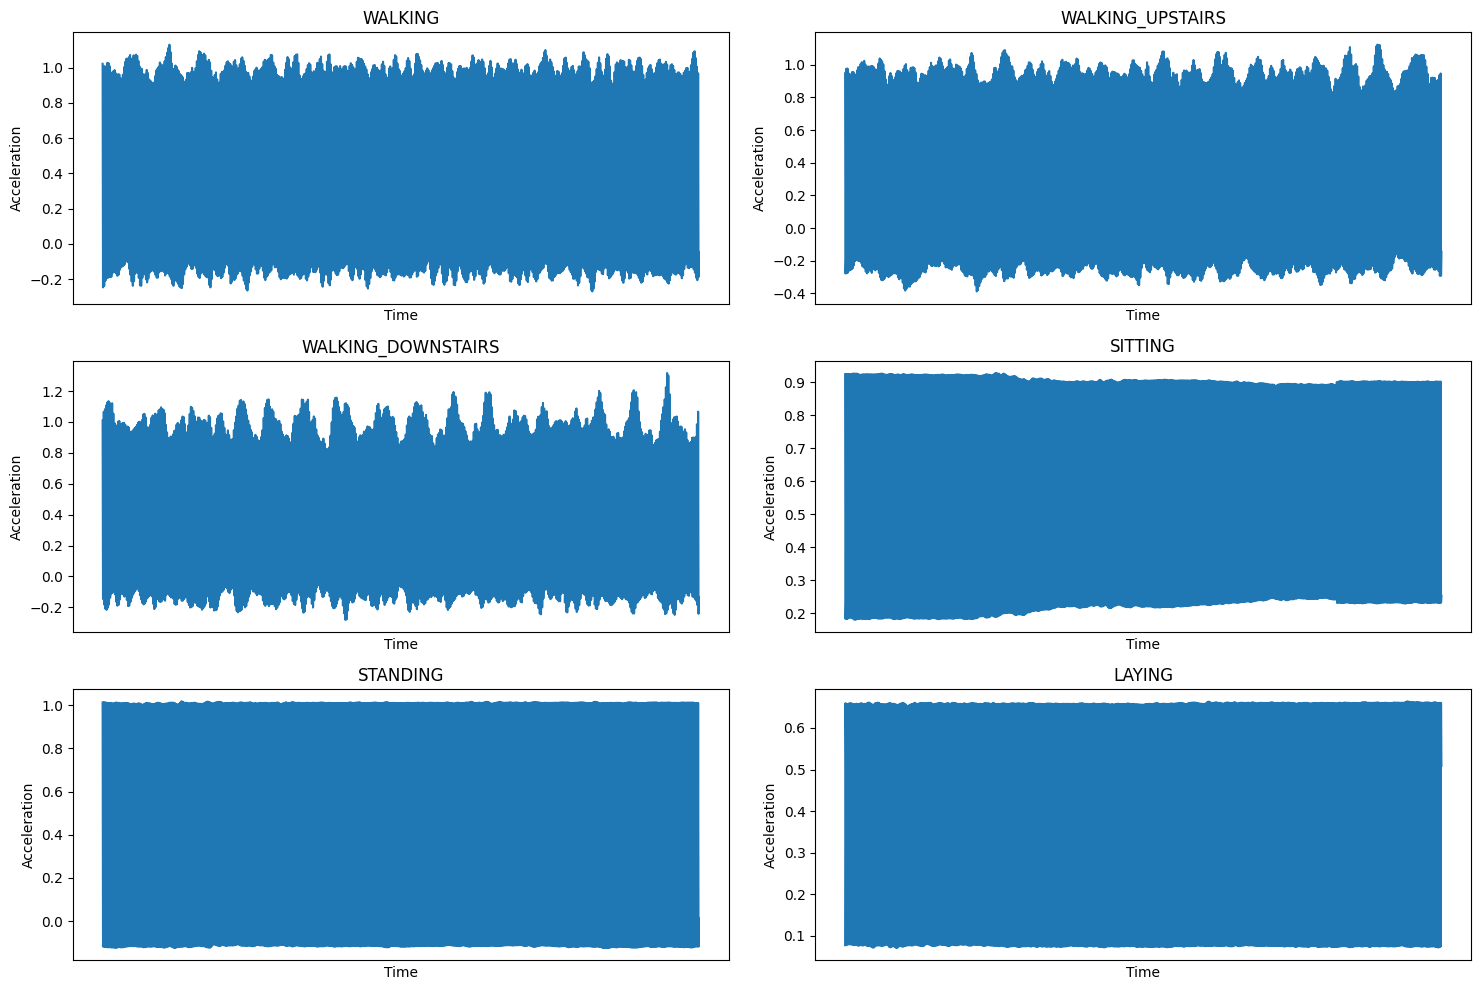

In [15]:
plot_waveform(X_train, y_train)

Based on the above plots, it is clear that for dhnamic activities, the wavefrom have variations while for static activites the waveform is constant.

Question 2 : 

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_activity_acceleration(X: np.ndarray, y: np.ndarray, rows: int = 3, cols: int = 2) -> None:
  
    # Compute the magnitude of linear acceleration
    acceleration_magnitude = np.sqrt(np.sum(np.square(X), axis=2))
    
    # Create a DataFrame for easier plotting
    acceleration_df = pd.DataFrame(acceleration_magnitude, columns=[f"accel_{i}" for i in range(acceleration_magnitude.shape[1])])
    acceleration_df['activity'] = y
    
    # Create subplots for each activity
    fig, subplot_axes = plt.subplots(rows, cols, figsize=(20, 15))
    subplot_axes = subplot_axes.flatten()
    
    # Define activity labels
    activity_labels = {
        1: "WALKING",
        2: "WALKING_UPSTAIRS",
        3: "WALKING_DOWNSTAIRS",
        4: "SITTING",
        5: "STANDING",
        6: "LAYING"
    }
    
    # Plot the average linear acceleration for each activity class
    for index, activity_class in enumerate(sorted(acceleration_df['activity'].unique())):
        class_df = acceleration_df[acceleration_df['activity'] == activity_class].drop(columns='activity')
        avg_acceleration = class_df.mean()
        
        subplot_axes[index].plot(avg_acceleration)
        subplot_axes[index].set_title(f'{activity_labels[activity_class]}')
        subplot_axes[index].set_xlabel('Time')
        subplot_axes[index].set_ylabel('Acceleration')
        subplot_axes[index].set_xticks([])
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


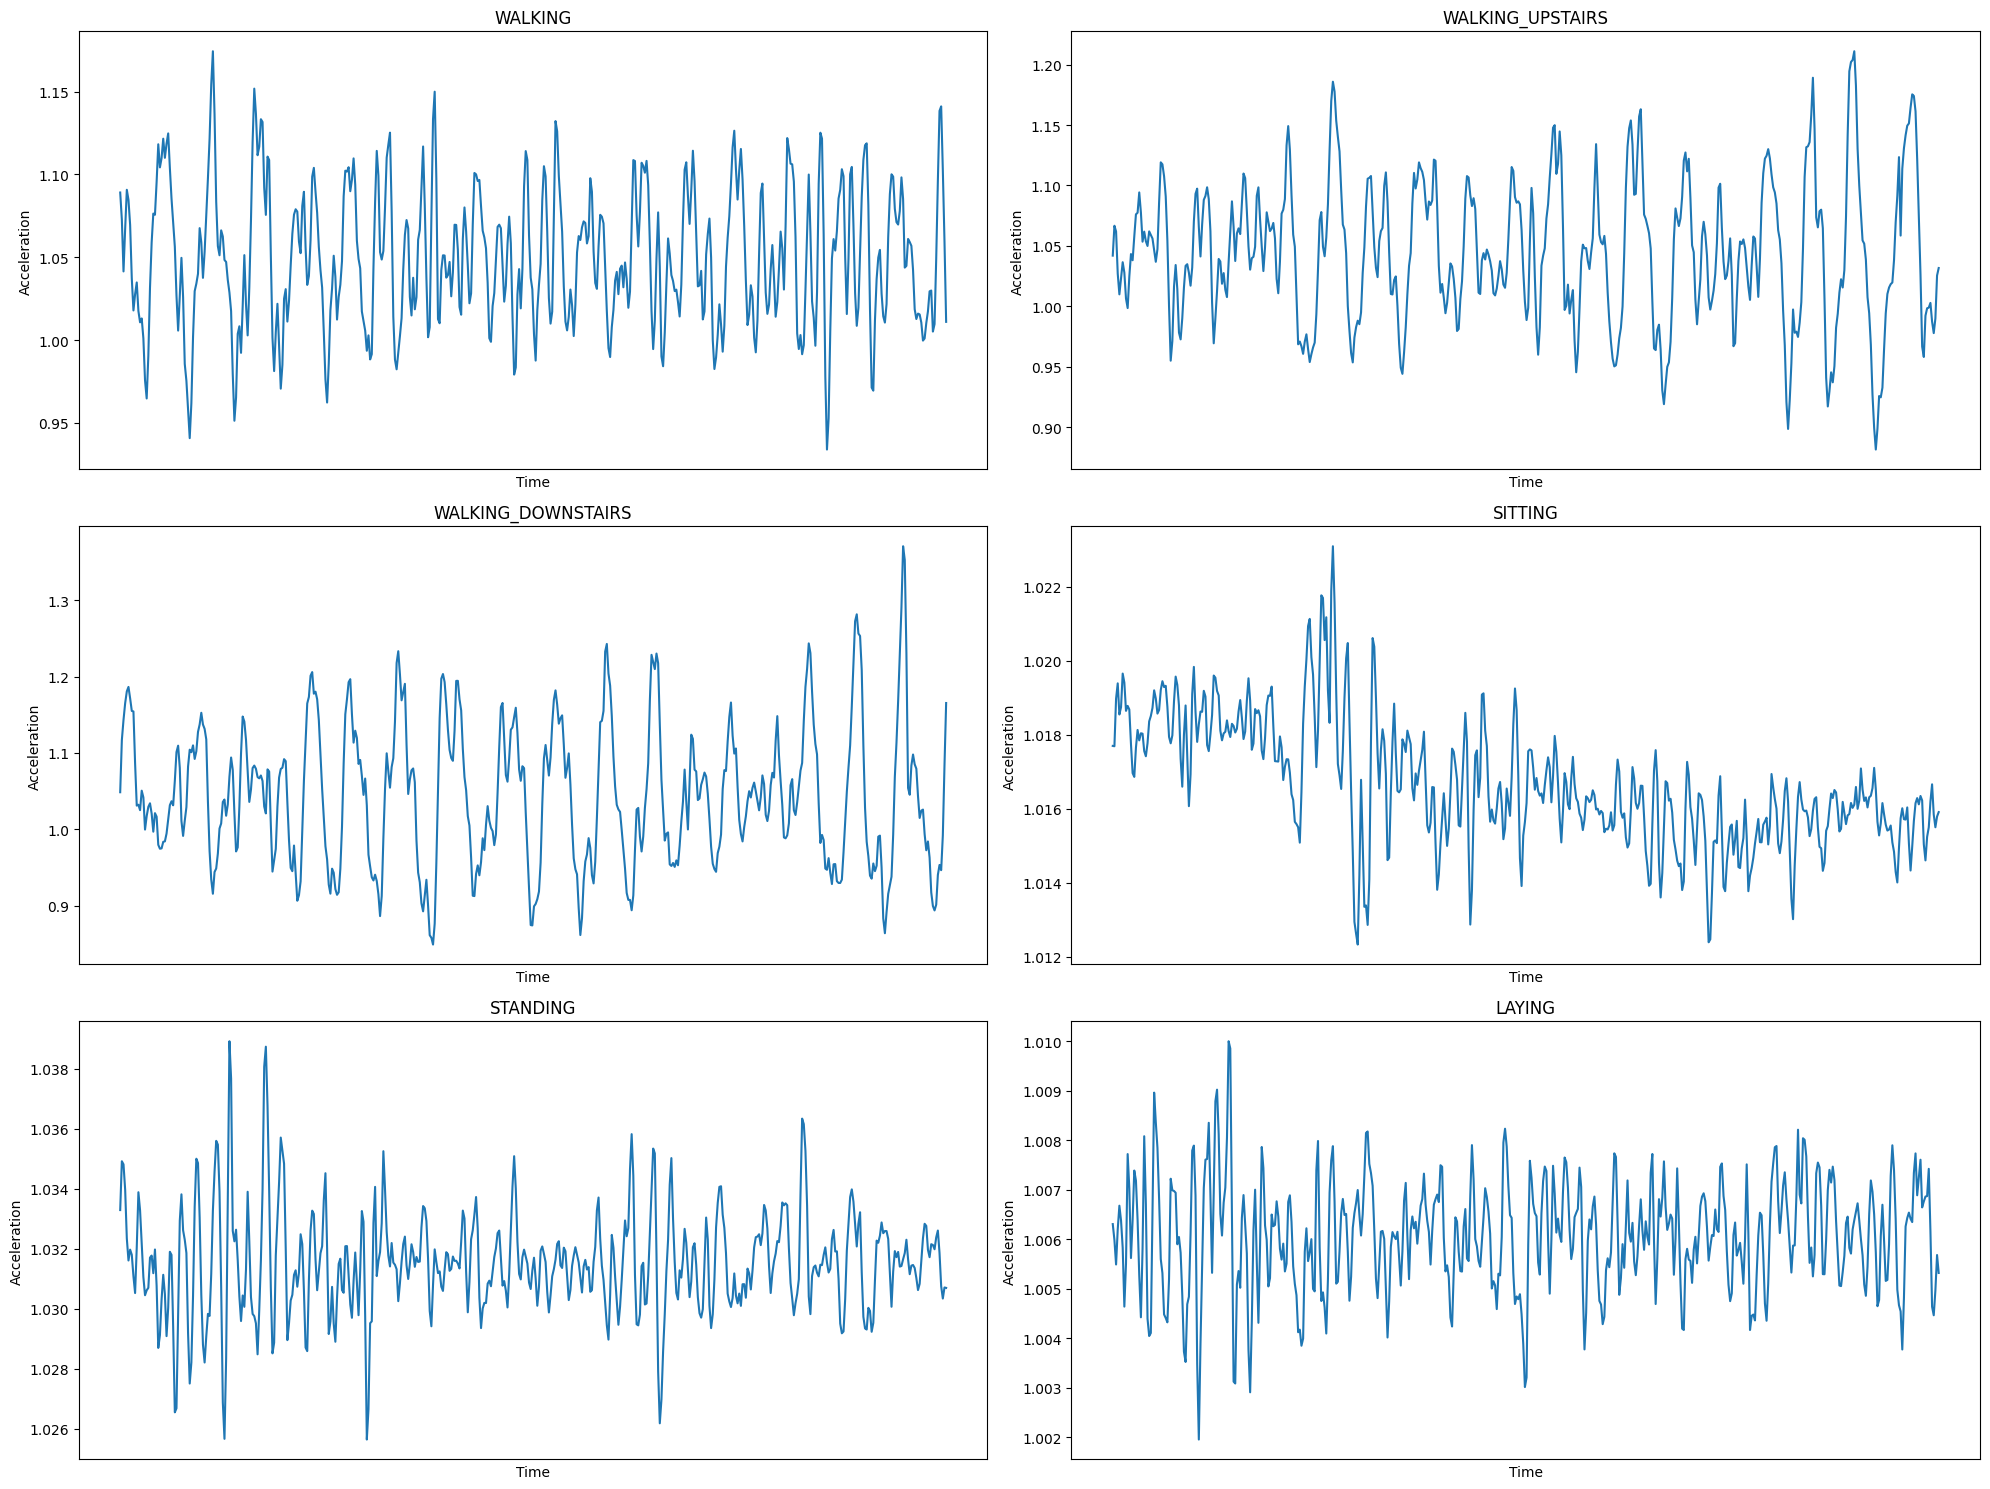

In [21]:
plot_activity_acceleration(X_train, y_train)

Question3 

3.1


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def preprocess_data(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
   
    df = pd.DataFrame(X.reshape(-1, 3), columns=['acc_x', 'acc_y', 'acc_z'])
    df['activity'] = np.repeat(y, 500)
    return df

train_data = preprocess_data(X_train, y_train)
test_data = preprocess_data(X_test, y_test)
validation_data = preprocess_data(X_val, y_val)
# Calculate the total acceleration for each sample
train_data['total_acceleration'] = np.sqrt(np.sum(X_train ** 2, axis=2)).reshape(-1)
test_data['total_acceleration'] = np.sqrt(np.sum(X_test ** 2, axis=2)).reshape(-1)
validation_data['total_acceleration'] = np.sqrt(np.sum(X_val ** 2, axis=2)).reshape(-1)

# Prepare the data for PCA
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data.drop('activity_label', axis=1))

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_train_data)

# Create a DataFrame with PCA results
pca_data = pd.DataFrame(pca_result, columns=['component_1', 'component_2'])
pca_data['activity_label'] = train_data['activity_label']

# Plot the PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(x='component_1', y='component_2', hue='activity_label', data=pca_data, palette='viridis')
plt.title('PCA of Total Acceleration Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()


KeyError: "['activity_label'] not found in axis"